In [1]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.streaming.kafka import KafkaUtils
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sc.stop()
__name__ == "__ main __"
sc = SparkContext(appName="PythonSparkStreamingKafka")
ssc = StreamingContext(sc,60)
kafkaStream = KafkaUtils.createStream(ssc, 'localhost:2181', 'spark-streaming', {'prueba2':1})

In [3]:
parsed = kafkaStream.map(lambda v: json.loads(v[1]))
tweets = kafkaStream.count().map(lambda x: ('Tweets en este batch: %s' % x))
contar = parsed.map(lambda tweet: (tweet['user']["screen_name"]))
batch = contar.countByValue().transform(lambda rdd:rdd.sortBy(lambda x:-x[1])).map(lambda x:"\tValue %s\tCount %s" % (x[0],x[1]))
prueba = tweets.union(batch)
counts = []
prueba.foreachRDD(lambda t,rdd: counts.append(rdd.collect()))
prueba.pprint()

In [4]:
ssc.start()
ssc.awaitTermination(timeout=120)

-------------------------------------------
Time: 2019-03-04 13:10:00
-------------------------------------------
Tweets en este batch: 25
	Value ChrisWill1337	Count 2
	Value JULIETACOTTIER	Count 1
	Value Lulu34Lulu7	Count 1
	Value vavspecialist	Count 1
	Value dizo258	Count 1
	Value big12go_wvu	Count 1
	Value crummyworld	Count 1
	Value JorgeSimon94	Count 1
	Value tngadd	Count 1
...

-------------------------------------------
Time: 2019-03-04 13:11:00
-------------------------------------------
Tweets en este batch: 19
	Value paoegilles	Count 2
	Value MrFreeUS	Count 2
	Value BsPoliticalBS	Count 1
	Value derikv	Count 1
	Value tou_love0719	Count 1
	Value MichelaJoy	Count 1
	Value BranchCom2001	Count 1
	Value sue_varriano	Count 1
	Value oarcinie	Count 1
...



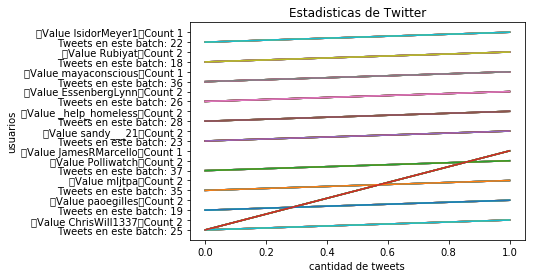

-------------------------------------------
Time: 2019-03-04 13:21:00
-------------------------------------------
Tweets en este batch: 23
	Value Alpha_Omega_Yah	Count 3
	Value WomensPowerBook	Count 1
	Value paolominervino	Count 1
	Value JamesRMarcello	Count 1
	Value cather435	Count 1
	Value ThisIsAbidKhan	Count 1
	Value SamuelP84463985	Count 1
	Value aufdemlandleber	Count 1
	Value L_Scordamaglia	Count 1
...



In [20]:
for x in range(10):
    for i in counts:
        plt.plot(i[:2])
plt.title("Estadisticas de Twitter")
plt.xlabel("cantidad de tweets")
plt.ylabel("usuarios")
plt.show()

In [21]:
ssc.stop()